In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 1: Cloning and Building Darknet

# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# verify CUDA
!/usr/local/cuda/bin/nvcc --version

# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15442, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15442 (delta 1), reused 15 (delta 1), pack-reused 15424
Receiving objects: 100% (15442/15442), 14.05 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (10367/10367), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/

In [3]:
# Step 3: Define Helper Functions

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [4]:
#Step 4: Dataset configuration and training setting 

#dataset configuration 
!cp /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/obj_832.data /content/darknet/data/obj_832.data
!cp /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/obj_832.names /content/darknet/data/obj_832.names
!cp /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/yolov4_custom_832.cfg /content/darknet/cfg/yolov4_custom_832.cfg
!unzip /content/drive/MyDrive/yoloshared/dataset/sawit200x200m_final_validation/obj.zip -d data/
!python /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/generate_train.py
!unzip /content/drive/MyDrive/yoloshared/dataset/sawit200x200m_final_validation/test.zip -d data/
!python /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/generate_test.py

Archive:  /content/drive/MyDrive/yoloshared/dataset/sawit200x200m_final_validation/obj.zip
   creating: data/obj/
  inflating: data/obj/200x200m_101_1.jpg  
  inflating: data/obj/200x200m_101_1.txt  
  inflating: data/obj/200x200m_101_2.jpg  
  inflating: data/obj/200x200m_101_2.txt  
  inflating: data/obj/200x200m_101_3.jpg  
  inflating: data/obj/200x200m_101_3.txt  
  inflating: data/obj/200x200m_101_4.jpg  
  inflating: data/obj/200x200m_101_4.txt  
  inflating: data/obj/200x200m_106_10.jpg  
  inflating: data/obj/200x200m_106_10.txt  
  inflating: data/obj/200x200m_106_11.jpg  
  inflating: data/obj/200x200m_106_11.txt  
  inflating: data/obj/200x200m_106_2.jpg  
  inflating: data/obj/200x200m_106_2.txt  
  inflating: data/obj/200x200m_106_3.jpg  
  inflating: data/obj/200x200m_106_3.txt  
  inflating: data/obj/200x200m_106_5.jpg  
  inflating: data/obj/200x200m_106_5.txt  
  inflating: data/obj/200x200m_106_6.jpg  
  inflating: data/obj/200x200m_106_6.txt  
  inflating: data/obj/

In [5]:
#Step 7: run detections

#custom cfg to test mode configuration 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4_custom_832.cfg
!sed -i 's/subdivisions=32/subdivisions=1/' yolov4_custom_832.cfg
%cd ..

#configuration image.c
#hide class names and labels // line 436,438, 441-446
#configuration of thickness of the bounding box at line 369
!cp /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/image.c /content/darknet/src/image.c
# restart/make darknet (build)
!make

/content/darknet/cfg
/content/darknet
chmod +x *.sh
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image.c -o obj/image.o
./src/image.c: In function ‘draw_detections_v3’:
./src/image.c:440:21: warning: unused variable ‘j’ [-Wunused-variable]
                 int j;
                     ^
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    832 x 832 x   3 ->  832 x 832 x  32 1.196 BF
   1 conv     64       3 x 3/ 2    832 x 832 x  32 ->  416 x 416 x  64 6.380 BF
   2 conv     64       1 x 1/ 1    416 x 416 x  64 ->  416 x 416 x  64 1.418 BF
   3 route  1 		                           ->  416 x 416 x  64 
   4 conv     64       1 x 1/ 1    416 x 416 x  64 ->  416 x 416 x  64 1.418 BF
   5 conv     32       1 x 1/ 1    416 x 416 x  64 ->  416 x 416 x  32 0.709 BF
   6 conv     64       3 x 3/ 1    416 x 416 x  32 ->  416 x 416 x  64 6.380 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 416 x 416 x  64 0.011 BF
   8 conv   

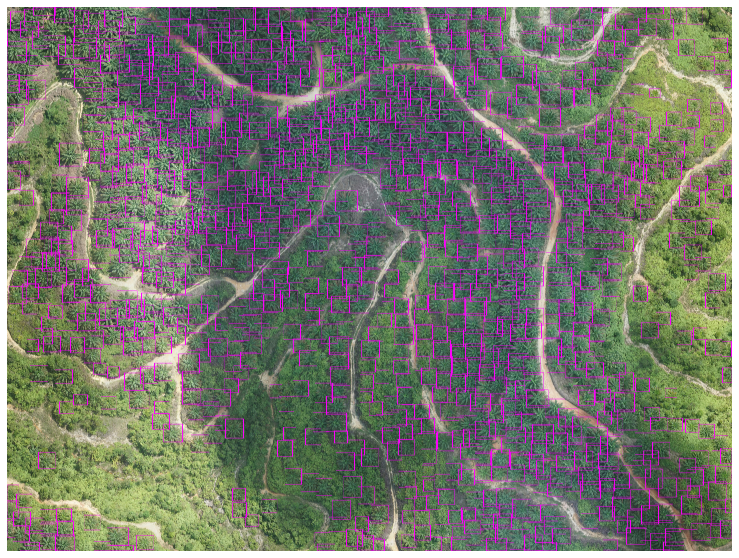

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
#run detector
!./darknet detector test data/obj_832.data cfg/yolov4_custom_832.cfg /content/drive/MyDrive/yoloshared/config/yolov4sawitconvo137/backup200x200m_final_random0_832_validation/yolov4_custom_832_4000.weights /content/drive/MyDrive/yoloshared/dataset/Test/final/400x300m_wil16_grid22.jpg -thresh 0.4 -ext_output -dont_show -out result.json
imShow('predictions.jpg')
download('predictions.jpg')
download('result.json')